In [1]:
# Preparação dos dados
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

sns.set_theme()

In [2]:
## Importar dataset

data_path = '../data/' if os.path.exists(
    '../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/prepared/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente númerico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4914 non-null   int64
 1   mês                                        4914 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64
 4   cpes_domestico_baixa_tensao                4914 non-null   int64
 5   cpes_domestico_alta_tensao                 4914 non-null   int64
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64
 9   cpes_outros_baixa_tensao                   4914 non-null   int64
 10  cpes_outros_alta_tensao                    4914 

### Separar os datasets em dois:
    - Um para baixa e outro para alta tensão

In [4]:
# Selecionar as variáveis de baixa tensão
baixa_tensao_columns = ['ano', 'mês', 'energia_ativa_baixa_tensao_kwh', 
                        'cpes_domestico_baixa_tensao', 'cpes_iluminacao_publica_baixa_tensao',
                        'cpes_nao_domestico_baixa_tensao', 'cpes_outros_baixa_tensao',
                        'cpes_mobilidade_eletrica_nao_baixa_tensao', 'cpes_mobilidade_eletrica_sim_baixa_tensao']

# Selecionar as variáveis de alta tensão
alta_tensao_columns = ['ano', 'mês', 'energia_ativa_alta_tensao_kwh',
                       'cpes_domestico_alta_tensao',
                       'cpes_nao_domestico_alta_tensao', 'cpes_outros_alta_tensao']

# Criar os datasets separados
baixa_tensao_df = merged_df[baixa_tensao_columns].copy()
alta_tensao_df = merged_df[alta_tensao_columns].copy()

#### Dataframe de baixa tensão

In [5]:
baixa_tensao_df.info()
baixa_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4914 non-null   int64
 1   mês                                        4914 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64
 3   cpes_domestico_baixa_tensao                4914 non-null   int64
 4   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64
 5   cpes_nao_domestico_baixa_tensao            4914 non-null   int64
 6   cpes_outros_baixa_tensao                   4914 non-null   int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  4914 non-null   int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  4914 non-null   int64
dtypes: int64(9)
memory usage: 345.6 KB


,ano,mês,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,2022.777778,7.166667,6.473418e+06,18802.326414,214.084046,4241.061661,128.958079,27020.995319,9.315832
std,0.532924,3.625129,1.161919e+07,29402.960918,194.120963,6870.529538,206.186626,45854.018577,24.622134
min,2022.000000,1.000000,1.390660e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000
25%,2022.000000,4.000000,1.269620e+06,4581.000000,91.000000,1101.000000,21.000000,6044.000000,2.000000
50%,2023.000000,8.000000,2.618006e+06,8936.000000,141.000000,1989.500000,54.000000,11336.000000,2.000000
75%,2023.000000,10.000000,7.045592e+06,21427.000000,280.000000,4897.250000,157.000000,29565.500000,6.000000
max,2024.000000,12.000000,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,528158.000000,382.000000


In [6]:
# Verificar valores vazios
nulls = baixa_tensao_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 0


#### Guardar dataset de baixa tensão

In [7]:
file_path = data_path + 'treated/prepared/numeric/dataset-numeric-low-tension.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/dataset-numeric-low-tension.csv


#### Dataframe de alta tensão

In [8]:
alta_tensao_df.info()
alta_tensao_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   ano                             4914 non-null   int64
 1   mês                             4914 non-null   int64
 2   energia_ativa_alta_tensao_kwh   4914 non-null   int64
 3   cpes_domestico_alta_tensao      4914 non-null   int64
 4   cpes_nao_domestico_alta_tensao  4914 non-null   int64
 5   cpes_outros_alta_tensao         4914 non-null   int64
dtypes: int64(6)
memory usage: 230.5 KB


,ano,mês,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4914.000000,4914.000000,4.914000e+03,4914.000000,4914.000000,4914.000000
mean,2022.777778,7.166667,6.872585e+06,0.040090,95.435694,0.385836
std,0.532924,3.625129,1.423193e+07,0.209242,121.195235,4.184540
min,2022.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2022.000000,4.000000,4.162925e+05,0.000000,28.000000,0.000000
50%,2023.000000,8.000000,1.837661e+06,0.000000,51.000000,0.000000
75%,2023.000000,10.000000,5.952910e+06,0.000000,119.000000,0.000000
max,2024.000000,12.000000,1.279470e+08,2.000000,1226.000000,75.000000


In [9]:
# Verificar valores vazios
nulls = alta_tensao_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 20


#### Guardar dataset de alta tensão

In [10]:
file_path = data_path + 'treated/prepared/numeric/dataset-numeric-high-tension.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/dataset-numeric-high-tension.csv


### Criar dois subsets dentro de cada dataset de nivel de tensao

#### Criar o subset de teste (Dados de 2024)

In [11]:
# Filtrar o DataFrame para obter os valores de 2024
baixa_tensao_2024_df = baixa_tensao_df[(baixa_tensao_df['ano'] == 2024)].copy()

baixa_tensao_2024_df.info()
baixa_tensao_2024_df.describe()

# Filtrar o DataFrame para obter os valores de 2024
alta_tensao_2024_df = alta_tensao_df[(alta_tensao_df['ano'] == 2024)].copy()

alta_tensao_2024_df.info()
alta_tensao_2024_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 17 to 4913
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        273 non-null    int64
 1   mês                                        273 non-null    int64
 2   energia_ativa_baixa_tensao_kwh             273 non-null    int64
 3   cpes_domestico_baixa_tensao                273 non-null    int64
 4   cpes_iluminacao_publica_baixa_tensao       273 non-null    int64
 5   cpes_nao_domestico_baixa_tensao            273 non-null    int64
 6   cpes_outros_baixa_tensao                   273 non-null    int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  273 non-null    int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  273 non-null    int64
dtypes: int64(9)
memory usage: 21.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 17 to 4913
Data columns (total 6

,ano,mês,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,273.0,273.0,2.730000e+02,273.000000,273.000000,273.0
mean,2024.0,1.0,1.528861e+06,0.047619,96.366300,0.0
std,0.0,0.0,2.761528e+06,0.245406,122.724874,0.0
min,2024.0,1.0,0.000000e+00,0.000000,0.000000,0.0
25%,2024.0,1.0,1.234420e+05,0.000000,29.000000,0.0
50%,2024.0,1.0,5.144380e+05,0.000000,52.000000,0.0
75%,2024.0,1.0,1.654728e+06,0.000000,119.000000,0.0
max,2024.0,1.0,2.596288e+07,2.000000,1226.000000,0.0


Ver nulls e duplicados

In [12]:
# Verificar valores vazios
nulls = baixa_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 0


In [13]:
# Verificar valores vazios
nulls = alta_tensao_2024_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_2024_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 3


##### Guardar subset de teste (2024)

In [14]:
file_path = data_path + 'treated/prepared/numeric/test/dataset-numeric-low-tension-2024.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/test/dataset-numeric-low-tension-2024.csv


In [15]:
file_path = data_path + 'treated/prepared/numeric/test/dataset-numeric-high-tension-2024.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/test/dataset-numeric-high-tension-2024.csv


#### Criar o subset de treino (2024)

In [16]:
# Filtrar o DataFrame para obter os valores que não são de 2024
baixa_tensao_outros_df = baixa_tensao_df[(baixa_tensao_df['ano'] != 2024)].copy()

baixa_tensao_outros_df.info()
baixa_tensao_outros_df.describe()

# Filtrar o DataFrame para obter os valores que não são de 2024
alta_tensao_outros_df = alta_tensao_df[(alta_tensao_df['ano'] != 2024)].copy()

alta_tensao_outros_df.info()
alta_tensao_outros_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4912
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4641 non-null   int64
 1   mês                                        4641 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4641 non-null   int64
 3   cpes_domestico_baixa_tensao                4641 non-null   int64
 4   cpes_iluminacao_publica_baixa_tensao       4641 non-null   int64
 5   cpes_nao_domestico_baixa_tensao            4641 non-null   int64
 6   cpes_outros_baixa_tensao                   4641 non-null   int64
 7   cpes_mobilidade_eletrica_nao_baixa_tensao  4641 non-null   int64
 8   cpes_mobilidade_eletrica_sim_baixa_tensao  4641 non-null   int64
dtypes: int64(9)
memory usage: 362.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4641 entries, 0 to 4912
Data columns (total 

,ano,mês,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4641.000000,4641.000000,4.641000e+03,4641.000000,4641.000000,4641.000000
mean,2022.705882,7.529412,7.186922e+06,0.039647,95.380952,0.408533
std,0.455694,3.397902,1.456843e+07,0.206940,121.117813,4.304804
min,2022.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2022.000000,5.000000,4.570540e+05,0.000000,28.000000,0.000000
50%,2023.000000,8.000000,1.955336e+06,0.000000,51.000000,0.000000
75%,2023.000000,10.000000,6.360625e+06,0.000000,119.000000,0.000000
max,2023.000000,12.000000,1.279470e+08,2.000000,1224.000000,75.000000


Ver nulls e duplicados

In [17]:
# Verificar valores vazios
nulls = baixa_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = baixa_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                                          0
mês                                          0
energia_ativa_baixa_tensao_kwh               0
cpes_domestico_baixa_tensao                  0
cpes_iluminacao_publica_baixa_tensao         0
cpes_nao_domestico_baixa_tensao              0
cpes_outros_baixa_tensao                     0
cpes_mobilidade_eletrica_nao_baixa_tensao    0
cpes_mobilidade_eletrica_sim_baixa_tensao    0
dtype: int64
Número de linhas duplicadas: 0


In [18]:
# Verificar valores vazios
nulls = alta_tensao_outros_df.isnull().sum()
print('Número de nulls: ', nulls)

# Verificar duplicados
duplicates = alta_tensao_outros_df.duplicated()
print("Número de linhas duplicadas:", duplicates.sum())

Número de nulls:  ano                               0
mês                               0
energia_ativa_alta_tensao_kwh     0
cpes_domestico_alta_tensao        0
cpes_nao_domestico_alta_tensao    0
cpes_outros_alta_tensao           0
dtype: int64
Número de linhas duplicadas: 17


##### Guardar subset de treino (2022 e 2023)

In [19]:
file_path = data_path + 'treated/prepared/numeric/train/dataset-numeric-low-tension-2022-2023.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/train/dataset-numeric-low-tension-2022-2023.csv


In [20]:
file_path = data_path + 'treated/prepared/numeric/train/dataset-numeric-high-tension-2022-2023.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/train/dataset-numeric-high-tension-2022-2023.csv


### Guardar versões dos datasets sem a coluna ano e mês pois estas não têm boa correlação e por isso não têm interesse na análise

In [21]:
merged_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-both-tensions-no-dates.csv'

merged_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-both-tensions-no-dates.csv


In [22]:
baixa_tensao_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-no-dates.csv'

baixa_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-no-dates.csv


In [23]:
baixa_tensao_2024_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-test-no-dates.csv'

baixa_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-test-no-dates.csv


In [24]:
baixa_tensao_outros_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-train-no-dates.csv'

baixa_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-low-tensions-train-no-dates.csv


In [25]:
alta_tensao_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-no-dates.csv'

alta_tensao_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-no-dates.csv


In [26]:
alta_tensao_2024_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-test-no-dates.csv'

alta_tensao_2024_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-test-no-dates.csv


In [27]:
alta_tensao_outros_df.drop(columns=['ano', 'mês'], inplace=True)

file_path = data_path + 'treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-train-no-dates.csv'

alta_tensao_outros_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/no-dates/dataset-numeric-high-tensions-train-no-dates.csv


## Normalização MinMax

### Normalização MinMax das baixas tensões

In [28]:
# Normalização com o MinMax
scaler = MinMaxScaler()
baixa_tensao_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_df), columns=baixa_tensao_df.columns)

baixa_tensao_scaled_min_max_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,0.035328,0.061788,0.242784,0.051923,0.037529,0.039942,0.005236
1,0.031719,0.061820,0.242784,0.051836,0.036613,0.040705,0.005236
2,0.032404,0.061852,0.242784,0.051723,0.036613,0.041710,0.005236
3,0.034943,0.061888,0.242784,0.051798,0.036156,0.043251,0.005236
4,0.040670,0.061907,0.243633,0.051848,0.037071,0.044166,0.005236


In [29]:
# Estatísticas resumidas antes da normalização
baixa_tensao_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,6.473418e+06,18802.326414,214.084046,4241.061661,128.958079,27020.995319,9.315832
std,1.161919e+07,29402.960918,194.120963,6870.529538,206.186626,45854.018577,24.622134
min,1.390660e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000
25%,1.269620e+06,4581.000000,91.000000,1101.000000,21.000000,6044.000000,2.000000
50%,2.618006e+06,8936.000000,141.000000,1989.500000,54.000000,11336.000000,2.000000
75%,7.045592e+06,21427.000000,280.000000,4897.250000,157.000000,29565.500000,6.000000
max,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,528158.000000,382.000000


In [30]:
# Estatísticas resumidas depois da normalização
baixa_tensao_scaled_min_max_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,0.038804,0.057101,0.175793,0.050959,0.058562,0.049101,0.024387
std,0.071178,0.094534,0.164789,0.086086,0.094365,0.087007,0.064456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006926,0.011378,0.071307,0.011615,0.009153,0.009298,0.005236
50%,0.015186,0.025380,0.113752,0.022748,0.024256,0.019339,0.005236
75%,0.042309,0.065540,0.231749,0.059181,0.071396,0.053929,0.015707
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-minmax.csv'

baixa_tensao_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-minmax.csv


### Normalização MinMax das altas tensões

In [32]:
# Normalização com o MinMax
scaler = MinMaxScaler()
alta_tensao_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(alta_tensao_df), columns=alta_tensao_df.columns)

alta_tensao_scaled_min_max_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
0,0.046047,0.0,0.109299,0.0
1,0.048138,0.0,0.109299,0.0
2,0.049713,0.0,0.109299,0.0
3,0.046591,0.0,0.109299,0.0
4,0.041206,0.0,0.109299,0.0


In [33]:
# Estatísticas resumidas antes da normalização
alta_tensao_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4.914000e+03,4914.000000,4914.000000,4914.000000
mean,6.872585e+06,0.040090,95.435694,0.385836
std,1.423193e+07,0.209242,121.195235,4.184540
min,0.000000e+00,0.000000,0.000000,0.000000
25%,4.162925e+05,0.000000,28.000000,0.000000
50%,1.837661e+06,0.000000,51.000000,0.000000
75%,5.952910e+06,0.000000,119.000000,0.000000
max,1.279470e+08,2.000000,1226.000000,75.000000


In [34]:
# Estatísticas resumidas depois da normalização
alta_tensao_scaled_min_max_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4914.000000,4914.000000,4914.000000,4914.000000
mean,0.053714,0.020045,0.077843,0.005144
std,0.111233,0.104621,0.098854,0.055794
min,0.000000,0.000000,0.000000,0.000000
25%,0.003254,0.000000,0.022838,0.000000
50%,0.014363,0.000000,0.041599,0.000000
75%,0.046526,0.000000,0.097064,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [35]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-minmax.csv'

alta_tensao_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-minmax.csv


### Normalização MinMax baixa tensão 2024

In [36]:
# Normalização com o MinMax
scaler = MinMaxScaler()
baixa_tensao_2024_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_2024_df), columns=baixa_tensao_2024_df.columns)

baixa_tensao_2024_scaled_min_max_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,0.049968,0.062148,0.245331,0.052217,0.032619,0.062724,0.015707
1,0.005723,0.008883,0.075552,0.010188,0.003895,0.012399,0.010471
2,0.006239,0.007240,0.032258,0.007105,0.004869,0.006229,0.005236
3,0.032065,0.033263,0.145161,0.029373,0.045764,0.031089,0.010471
4,0.122774,0.134568,0.383701,0.129284,0.062804,0.150921,0.057592


In [37]:
# Estatísticas resumidas antes da normalização
baixa_tensao_2024_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,2.730000e+02,273.000000,273.000000,273.000000,273.00000,273.000000,273.000000
mean,3.549982e+06,18918.054945,215.216117,4274.000000,120.29304,32793.699634,14.238095
std,6.115725e+06,29659.687532,195.769130,6932.458115,198.23069,50423.988286,35.165550
min,1.390660e+05,1042.000000,7.000000,183.000000,1.00000,1875.000000,0.000000
25%,7.098610e+05,4581.000000,91.000000,1112.000000,18.00000,8268.000000,2.000000
50%,1.448285e+06,8938.000000,142.000000,2003.000000,49.00000,15134.000000,4.000000
75%,3.910561e+06,21507.000000,281.000000,4929.000000,141.00000,38928.000000,8.000000
max,6.678215e+07,312074.000000,1185.000000,79984.000000,2055.00000,516364.000000,382.000000


In [38]:
# Estatísticas resumidas depois da normalização
baixa_tensao_2024_scaled_min_max_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,0.051182,0.057473,0.176754,0.051265,0.058078,0.060096,0.037273
std,0.091768,0.095359,0.166188,0.086872,0.096510,0.098008,0.092056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.008565,0.011378,0.071307,0.011641,0.008277,0.012426,0.005236
50%,0.019645,0.025386,0.114601,0.022807,0.023369,0.025771,0.010471
75%,0.056592,0.065797,0.232598,0.059473,0.068160,0.072019,0.020942
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-minmax.csv'

baixa_tensao_2024_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-minmax.csv


### Normalização MinMax baixa tensão 22/23


In [40]:
# Normalização com o MinMax
scaler = MinMaxScaler()
baixa_tensao_outros_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_outros_df), columns=baixa_tensao_outros_df.columns)

baixa_tensao_outros_scaled_min_max_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,0.034932,0.061838,0.242991,0.051942,0.037529,0.039942,0.005435
1,0.031321,0.061870,0.242991,0.051854,0.036613,0.040705,0.005435
2,0.032006,0.061902,0.242991,0.051741,0.036613,0.041710,0.005435
3,0.034547,0.061937,0.242991,0.051816,0.036156,0.043251,0.005435
4,0.040276,0.061957,0.243840,0.051866,0.037071,0.044166,0.005435


In [41]:
# Estatísticas resumidas antes da normalização
baixa_tensao_outros_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.641000e+03,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,6.645385e+06,18795.518854,214.017453,4239.124111,129.467787,26681.424477,9.026287
std,1.184161e+07,29390.997527,194.044633,6867.617704,206.654356,45554.097416,23.831036
min,2.060870e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000
25%,1.308489e+06,4581.000000,91.000000,1101.000000,21.000000,5940.000000,2.000000
50%,2.682608e+06,8936.000000,141.000000,1989.000000,54.000000,11104.000000,2.000000
75%,7.395246e+06,21405.000000,280.000000,4892.000000,157.000000,29350.000000,6.000000
max,1.633807e+08,311824.000000,1184.000000,79956.000000,2186.000000,528158.000000,368.000000


In [42]:
# Estatísticas resumidas depois da normalização
baixa_tensao_outros_scaled_min_max_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,0.039463,0.057125,0.175886,0.050953,0.058795,0.048457,0.024528
std,0.072570,0.094571,0.164864,0.086080,0.094579,0.086438,0.064758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006756,0.011387,0.071368,0.011619,0.009153,0.009100,0.005435
50%,0.015177,0.025400,0.113849,0.022749,0.024256,0.018899,0.005435
75%,0.044058,0.065522,0.231946,0.059136,0.071396,0.053520,0.016304
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-minmax.csv'

baixa_tensao_outros_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-minmax.csv


### Normalização MinMax alta tensão 2024

In [44]:
# Normalização com o MinMax
scaler = MinMaxScaler()
alta_tensao_2024_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(alta_tensao_2024_df), columns=alta_tensao_2024_df.columns)

alta_tensao_2024_scaled_min_max_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
0,0.090654,0.0,0.105220,0.0
1,0.003014,0.0,0.013051,0.0
2,0.003152,0.0,0.030995,0.0
3,0.089293,0.0,0.074225,0.0
4,0.076864,0.0,0.106852,0.0


In [45]:
# Estatísticas resumidas antes da normalização
alta_tensao_2024_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,2.730000e+02,273.000000,273.000000,273.0
mean,1.528861e+06,0.047619,96.366300,0.0
std,2.761528e+06,0.245406,122.724874,0.0
min,0.000000e+00,0.000000,0.000000,0.0
25%,1.234420e+05,0.000000,29.000000,0.0
50%,5.144380e+05,0.000000,52.000000,0.0
75%,1.654728e+06,0.000000,119.000000,0.0
max,2.596288e+07,2.000000,1226.000000,0.0


In [46]:
# Estatísticas resumidas depois da normalização
alta_tensao_2024_scaled_min_max_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,273.000000,273.000000,273.000000,273.0
mean,0.058886,0.023810,0.078602,0.0
std,0.106364,0.122703,0.100102,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.004755,0.000000,0.023654,0.0
50%,0.019814,0.000000,0.042414,0.0
75%,0.063734,0.000000,0.097064,0.0
max,1.000000,1.000000,1.000000,0.0


In [47]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-minmax.csv'

alta_tensao_2024_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-minmax.csv


### Normalização MinMax alta tensão 22/23

In [48]:
# Normalização com o MinMax
scaler = MinMaxScaler()
alta_tensao_outros_scaled_min_max_df = pd.DataFrame(scaler.fit_transform(alta_tensao_outros_df), columns=alta_tensao_outros_df.columns)

alta_tensao_outros_scaled_min_max_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
0,0.046047,0.0,0.109477,0.0
1,0.048138,0.0,0.109477,0.0
2,0.049713,0.0,0.109477,0.0
3,0.046591,0.0,0.109477,0.0
4,0.041206,0.0,0.109477,0.0


In [49]:
# Estatísticas resumidas antes da normalização
alta_tensao_outros_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4.641000e+03,4641.000000,4641.000000,4641.000000
mean,7.186922e+06,0.039647,95.380952,0.408533
std,1.456843e+07,0.206940,121.117813,4.304804
min,0.000000e+00,0.000000,0.000000,0.000000
25%,4.570540e+05,0.000000,28.000000,0.000000
50%,1.955336e+06,0.000000,51.000000,0.000000
75%,6.360625e+06,0.000000,119.000000,0.000000
max,1.279470e+08,2.000000,1224.000000,75.000000


In [50]:
# Estatísticas resumidas depois da normalização
alta_tensao_outros_scaled_min_max_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4641.000000,4641.000000,4641.000000,4641.000000
mean,0.056171,0.019823,0.077926,0.005447
std,0.113863,0.103470,0.098952,0.057397
min,0.000000,0.000000,0.000000,0.000000
25%,0.003572,0.000000,0.022876,0.000000
50%,0.015282,0.000000,0.041667,0.000000
75%,0.049713,0.000000,0.097222,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [51]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-minmax.csv'

alta_tensao_outros_scaled_min_max_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-minmax.csv


## Normalização z-Score

### Normalização z-Score das baixas tensões

In [52]:
# Normalização com o Z-Score
scaler = StandardScaler()
baixa_tensao_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_df), columns=baixa_tensao_df.columns)

baixa_tensao_scaled_z_score_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,-0.048836,0.049581,0.406571,0.011199,-0.222918,-0.105279,-0.297154
1,-0.099547,0.049921,0.406571,0.010181,-0.232619,-0.096512,-0.297154
2,-0.089920,0.050261,0.406571,0.008870,-0.232619,-0.084952,-0.297154
3,-0.054239,0.050635,0.406571,0.009744,-0.237470,-0.067242,-0.297154
4,0.026228,0.050839,0.411723,0.010326,-0.227769,-0.056729,-0.297154


In [53]:
# Estatísticas resumidas antes da normalização
baixa_tensao_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.914000e+03,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000,4914.000000
mean,6.473418e+06,18802.326414,214.084046,4241.061661,128.958079,27020.995319,9.315832
std,1.161919e+07,29402.960918,194.120963,6870.529538,206.186626,45854.018577,24.622134
min,1.390660e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000
25%,1.269620e+06,4581.000000,91.000000,1101.000000,21.000000,6044.000000,2.000000
50%,2.618006e+06,8936.000000,141.000000,1989.500000,54.000000,11336.000000,2.000000
75%,7.045592e+06,21427.000000,280.000000,4897.250000,157.000000,29565.500000,6.000000
max,1.633807e+08,312074.000000,1185.000000,79984.000000,2186.000000,528158.000000,382.000000


In [54]:
# Estatísticas resumidas depois da normalização
baixa_tensao_scaled_z_score_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.914000e+03,4.914000e+03,4.914000e+03,4914.000000,4.914000e+03,4.914000e+03,4914.000000
mean,3.759485e-17,3.759485e-17,-2.024338e-17,0.000000,-8.386544e-17,-1.156765e-17,0.000000
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102,1.000102e+00,1.000102e+00,1.000102
min,-5.452185e-01,-6.040934e-01,-1.066887e+00,-0.592018,-6.206567e-01,-5.643917e-01,-0.378390
25%,-4.479081e-01,-4.837191e-01,-6.341230e-01,-0.457080,-5.236473e-01,-4.575200e-01,-0.297154
50%,-3.318480e-01,-3.355897e-01,-3.765255e-01,-0.327746,-3.635818e-01,-3.420985e-01,-0.297154
75%,4.924882e-02,8.927471e-02,3.395958e-01,0.095517,1.360165e-01,5.549707e-02,-0.134682
max,1.350552e+01,9.975238e+00,5.002112e+00,11.025445,9.977617e+00,1.093008e+01,15.137684


In [55]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-zscore.csv'

baixa_tensao_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-low-tensions-no-dates-zscore.csv


### Normalização z-Score das altas tensões

In [56]:
# Normalização com o Z-Score
scaler = StandardScaler()
alta_tensao_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(alta_tensao_df), columns=alta_tensao_df.columns)

alta_tensao_scaled_z_score_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
0,-0.068940,-0.191613,0.318232,-0.092215
1,-0.050137,-0.191613,0.318232,-0.092215
2,-0.035976,-0.191613,0.318232,-0.092215
3,-0.064047,-0.191613,0.318232,-0.092215
4,-0.112463,-0.191613,0.318232,-0.092215


In [57]:
# Estatísticas resumidas antes da normalização
alta_tensao_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4.914000e+03,4914.000000,4914.000000,4914.000000
mean,6.872585e+06,0.040090,95.435694,0.385836
std,1.423193e+07,0.209242,121.195235,4.184540
min,0.000000e+00,0.000000,0.000000,0.000000
25%,4.162925e+05,0.000000,28.000000,0.000000
50%,1.837661e+06,0.000000,51.000000,0.000000
75%,5.952910e+06,0.000000,119.000000,0.000000
max,1.279470e+08,2.000000,1226.000000,75.000000


In [58]:
# Estatísticas resumidas depois da normalização
alta_tensao_scaled_z_score_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4.914000e+03,4.914000e+03,4.914000e+03,4.914000e+03
mean,3.470294e-17,-4.627059e-17,1.735147e-17,2.891912e-18
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-4.829480e-01,-1.916135e-01,-7.875343e-01,-9.221460e-02
25%,-4.536945e-01,-1.916135e-01,-5.564786e-01,-9.221460e-02
50%,-3.538125e-01,-1.916135e-01,-3.666829e-01,-9.221460e-02
75%,-6.462708e-02,-1.916135e-01,1.944524e-01,-9.221460e-02
max,8.508102e+00,9.367662e+00,9.329404e+00,1.783273e+01


In [59]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-zscore.csv'

alta_tensao_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/dataset-numeric-high-tensions-no-dates-zscore.csv


### Normalização z-Score baixa tensão 2024

In [60]:
# Normalização com o Z-Score
scaler = StandardScaler()
baixa_tensao_2024_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_2024_df), columns=baixa_tensao_2024_df.columns)

baixa_tensao_2024_scaled_z_score_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,-0.013255,0.049111,0.413407,0.010983,-0.264283,0.026868,-0.234696
1,-0.496277,-0.510485,-0.610081,-0.473717,-0.562463,-0.487561,-0.291675
2,-0.490647,-0.527745,-0.871071,-0.509267,-0.552355,-0.550623,-0.348653
3,-0.208697,-0.254348,-0.190451,-0.252466,-0.127828,-0.296508,-0.291675
4,0.781572,0.809954,1.247549,0.899744,0.049058,0.928410,0.221130


In [61]:
# Estatísticas resumidas antes da normalização
baixa_tensao_2024_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,2.730000e+02,273.000000,273.000000,273.000000,273.00000,273.000000,273.000000
mean,3.549982e+06,18918.054945,215.216117,4274.000000,120.29304,32793.699634,14.238095
std,6.115725e+06,29659.687532,195.769130,6932.458115,198.23069,50423.988286,35.165550
min,1.390660e+05,1042.000000,7.000000,183.000000,1.00000,1875.000000,0.000000
25%,7.098610e+05,4581.000000,91.000000,1112.000000,18.00000,8268.000000,2.000000
50%,1.448285e+06,8938.000000,142.000000,2003.000000,49.00000,15134.000000,4.000000
75%,3.910561e+06,21507.000000,281.000000,4929.000000,141.00000,38928.000000,8.000000
max,6.678215e+07,312074.000000,1185.000000,79984.000000,2055.00000,516364.000000,382.000000


In [62]:
# Estatísticas resumidas depois da normalização
baixa_tensao_2024_scaled_z_score_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,2.730000e+02,2.730000e+02,2.730000e+02,273.000000,2.730000e+02,2.730000e+02,2.730000e+02
mean,-2.277381e-17,3.416071e-17,-8.133502e-17,0.000000,3.253401e-18,4.880101e-17,2.602721e-17
std,1.001837e+00,1.001837e+00,1.001837e+00,1.001837,1.001837e+00,1.001837e+00,1.001837e+00
min,-5.587531e-01,-6.038123e-01,-1.065533e+00,-0.591206,-6.028942e-01,-6.143005e-01,-4.056312e-01
25%,-4.652493e-01,-4.842730e-01,-6.356684e-01,-0.456953,-5.169780e-01,-4.872828e-01,-3.486529e-01
50%,-3.442857e-01,-3.371035e-01,-3.746790e-01,-0.328191,-3.603073e-01,-3.508674e-01,-2.916746e-01
75%,5.906757e-02,8.744865e-02,3.366450e-01,0.094657,1.046507e-01,1.218778e-01,-1.777180e-01
max,1.035826e+01,9.902139e+00,4.962810e+00,10.941147,9.777801e+00,9.607697e+00,1.047722e+01


In [63]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-zscore.csv'

baixa_tensao_2024_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-low-tensions-2024-no-dates-zscore.csv


### Normalização z-Score baixa tensão 22/23

In [64]:
# Normalização com o Z-Score
scaler = StandardScaler()
baixa_tensao_outros_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(baixa_tensao_outros_df), columns=baixa_tensao_outros_df.columns)

baixa_tensao_outros_scaled_z_score_df.head()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
0,-0.062443,0.049833,0.407077,0.011486,-0.224882,-0.098518,-0.294869
1,-0.112202,0.050173,0.407077,0.010467,-0.234561,-0.089693,-0.294869
2,-0.102755,0.050513,0.407077,0.009156,-0.234561,-0.078057,-0.294869
3,-0.067745,0.050888,0.407077,0.010030,-0.239400,-0.060230,-0.294869
4,0.011211,0.051092,0.412231,0.010613,-0.229721,-0.049648,-0.294869


In [65]:
# Estatísticas resumidas antes da normalização
baixa_tensao_outros_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.641000e+03,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000,4641.000000
mean,6.645385e+06,18795.518854,214.017453,4239.124111,129.467787,26681.424477,9.026287
std,1.184161e+07,29390.997527,194.044633,6867.617704,206.654356,45554.097416,23.831036
min,2.060870e+05,1042.000000,7.000000,174.000000,1.000000,1144.000000,0.000000
25%,1.308489e+06,4581.000000,91.000000,1101.000000,21.000000,5940.000000,2.000000
50%,2.682608e+06,8936.000000,141.000000,1989.000000,54.000000,11104.000000,2.000000
75%,7.395246e+06,21405.000000,280.000000,4892.000000,157.000000,29350.000000,6.000000
max,1.633807e+08,311824.000000,1184.000000,79956.000000,2186.000000,528158.000000,368.000000


In [66]:
# Estatísticas resumidas depois da normalização
baixa_tensao_outros_scaled_z_score_df.describe()

,energia_ativa_baixa_tensao_kwh,cpes_domestico_baixa_tensao,cpes_iluminacao_publica_baixa_tensao,cpes_nao_domestico_baixa_tensao,cpes_outros_baixa_tensao,cpes_mobilidade_eletrica_nao_baixa_tensao,cpes_mobilidade_eletrica_sim_baixa_tensao
count,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03,4641.000000
mean,-2.449619e-17,1.531012e-18,-1.837215e-17,-2.755822e-17,-3.674429e-17,-2.449619e-17,0.000000
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108
min,-5.438441e-01,-6.041112e-01,-1.066970e+00,-5.919902e-01,-6.217223e-01,-5.606560e-01,-0.378803
25%,-4.507385e-01,-4.836872e-01,-6.340330e-01,-4.569943e-01,-5.249320e-01,-4.553632e-01,-0.294869
50%,-3.346845e-01,-3.354967e-01,-3.763326e-01,-3.276779e-01,-3.652278e-01,-3.419913e-01,-0.294869
75%,6.333103e-02,8.879462e-02,3.400746e-01,9.507609e-02,1.332427e-01,5.858667e-02,-0.127003
max,1.323740e+01,9.971082e+00,4.999299e+00,1.102639e+01,9.952627e+00,1.100956e+01,15.064909


In [67]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-zscore.csv'

baixa_tensao_outros_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-low-tensions-2223-no-dates-zscore.csv


### Normalização z-Score alta tensão 2024

In [68]:
# Normalização com o Z-Score
scaler = StandardScaler()
alta_tensao_2024_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(alta_tensao_2024_df), columns=alta_tensao_2024_df.columns)

alta_tensao_2024_scaled_z_score_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
0,0.299214,-0.194398,0.266398,0.0
1,-0.526253,-0.194398,-0.656052,0.0
2,-0.524960,-0.194398,-0.476460,0.0
3,0.286395,-0.194398,-0.043807,0.0
4,0.169332,-0.194398,0.282724,0.0


In [69]:
# Estatísticas resumidas antes da normalização
alta_tensao_2024_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,2.730000e+02,273.000000,273.000000,273.0
mean,1.528861e+06,0.047619,96.366300,0.0
std,2.761528e+06,0.245406,122.724874,0.0
min,0.000000e+00,0.000000,0.000000,0.0
25%,1.234420e+05,0.000000,29.000000,0.0
50%,5.144380e+05,0.000000,52.000000,0.0
75%,1.654728e+06,0.000000,119.000000,0.0
max,2.596288e+07,2.000000,1226.000000,0.0


In [70]:
# Estatísticas resumidas depois da normalização
alta_tensao_2024_scaled_z_score_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,2.730000e+02,2.730000e+02,2.730000e+02,273.0
mean,1.952040e-17,-6.506802e-18,-3.253401e-18,0.0
std,1.001837e+00,1.001837e+00,1.001837e+00,0.0
min,-5.546454e-01,-1.943983e-01,-7.866643e-01,0.0
25%,-5.098627e-01,-1.943983e-01,-5.499294e-01,0.0
50%,-3.680158e-01,-1.943983e-01,-3.621742e-01,0.0
75%,4.566254e-02,-1.943983e-01,1.847651e-01,0.0
max,8.864259e+00,7.970330e+00,9.221507e+00,0.0


In [71]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-zscore.csv'

alta_tensao_2024_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/test/dataset-numeric-high-tensions-2024-no-dates-zscore.csv


### Normalização z-Score alta tensão 22/23

In [72]:
# Normalização com o Z-Score
scaler = StandardScaler()
alta_tensao_outros_scaled_z_score_df = pd.DataFrame(scaler.fit_transform(alta_tensao_outros_df), columns=alta_tensao_outros_df.columns)

alta_tensao_outros_scaled_z_score_df.head()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
0,-0.088926,-0.191605,0.31889,-0.094912
1,-0.070558,-0.191605,0.31889,-0.094912
2,-0.056724,-0.191605,0.31889,-0.094912
3,-0.084147,-0.191605,0.31889,-0.094912
4,-0.131445,-0.191605,0.31889,-0.094912


In [73]:
# Estatísticas resumidas antes da normalização
alta_tensao_outros_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4.641000e+03,4641.000000,4641.000000,4641.000000
mean,7.186922e+06,0.039647,95.380952,0.408533
std,1.456843e+07,0.206940,121.117813,4.304804
min,0.000000e+00,0.000000,0.000000,0.000000
25%,4.570540e+05,0.000000,28.000000,0.000000
50%,1.955336e+06,0.000000,51.000000,0.000000
75%,6.360625e+06,0.000000,119.000000,0.000000
max,1.279470e+08,2.000000,1224.000000,75.000000


In [74]:
# Estatísticas resumidas depois da normalização
alta_tensao_outros_scaled_z_score_df.describe()

,energia_ativa_alta_tensao_kwh,cpes_domestico_alta_tensao,cpes_nao_domestico_alta_tensao,cpes_outros_alta_tensao
count,4.641000e+03,4.641000e+03,4.641000e+03,4.641000e+03
mean,3.674429e-17,6.124049e-18,7.655061e-18,6.124049e-18
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00
min,-4.933748e-01,-1.916053e-01,-7.875904e-01,-9.491178e-02
25%,-4.619985e-01,-1.916053e-01,-5.563856e-01,-9.491178e-02
50%,-3.591430e-01,-1.916053e-01,-3.664674e-01,-9.491178e-02
75%,-5.672443e-02,-1.916053e-01,1.950299e-01,-9.491178e-02
max,8.290056e+00,9.474051e+00,9.319361e+00,1.732936e+01


In [75]:
#Guardar no ficheiro
file_path = data_path + 'treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-zscore.csv'

alta_tensao_outros_scaled_z_score_df.to_csv(file_path, index=False)

print("DataFrame guardado em ", file_path)

DataFrame guardado em  ../data/treated/prepared/numeric/normalized/train/dataset-numeric-high-tensions-2223-no-dates-zscore.csv


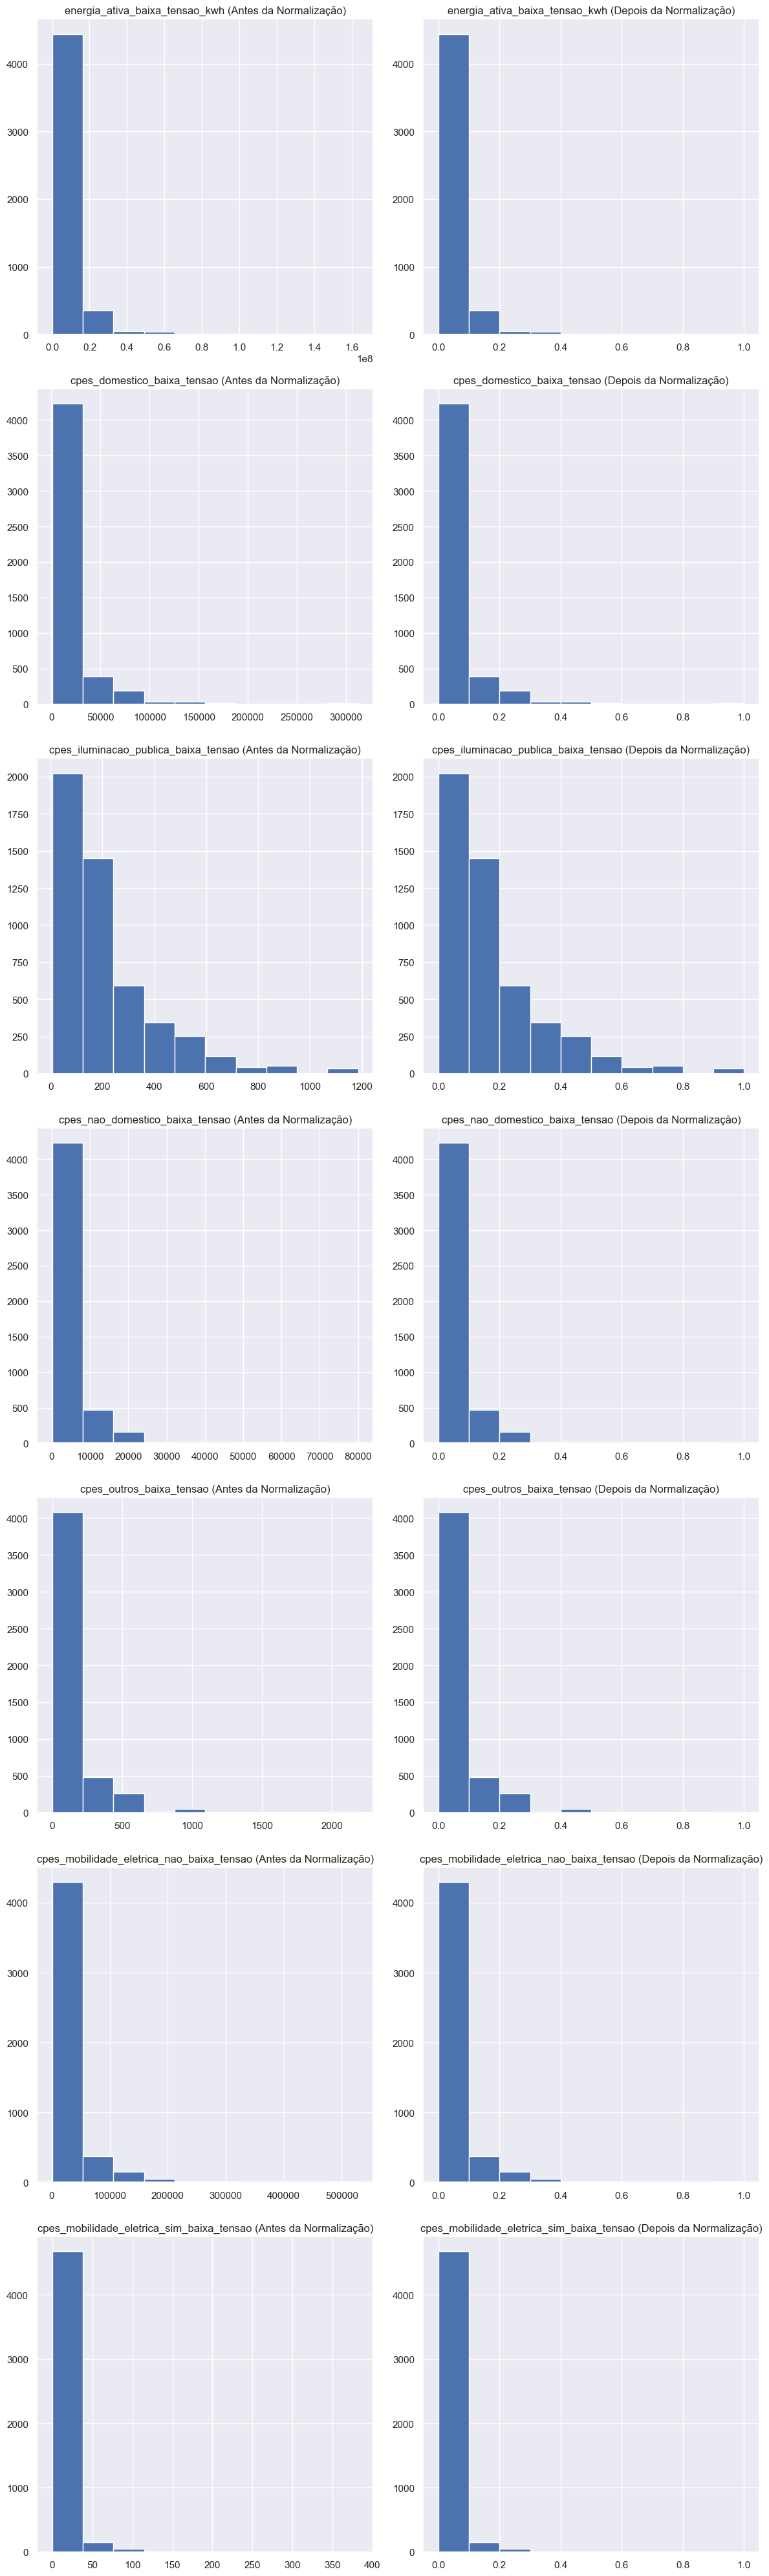

In [76]:
# Criar subplots
fig, axes = plt.subplots(nrows=len(baixa_tensao_df.columns), ncols=2, figsize=(12, 40))

num_bins = 10
# Histogramas antes da normalização
for i, col in enumerate(baixa_tensao_df.columns):
    merged_df[col].hist(ax=axes[i, 0], bins=num_bins)
    axes[i, 0].set_title(col + ' (Antes da Normalização)')

# Histogramas depois da normalização
for i, col in enumerate(baixa_tensao_scaled_min_max_df.columns):
    baixa_tensao_scaled_min_max_df[col].hist(ax=axes[i, 1], bins=num_bins)
    axes[i, 1].set_title(col + ' (Depois da Normalização)')

plt.tight_layout()
plt.show()
